# Exploratory Data Analysis

This processed data is not uploaded to the Github repo, as some of the files are too large. Run notebook 2 in order to produce the same files.

In [1]:
import pandas as pd

In [2]:
X_train = pd.read_pickle('../data/processed/X_stopword_train.pkl.gz')
y_train = pd.read_pickle('../data/processed/y_train.pkl.gz')
data = pd.concat([X_train, y_train], axis=1).rename(columns={0:'review'})
data

,review,voted_up
18820,old stylesome really great gamesthey look date...,True
60273,like quests quests quests game plus adventures...,True
71804,like game,True
17775,maybe love board game consider otherwise worth...,False
85649,free stuff,True
...,...,...
68340,life simulatorheadache machine clothes surviva...,True
36022,bean single greatest game ever played probably...,True
35434,i73840qm exp gdc expresscard gtx 1070 8gb 16g ...,False
17917,edit 2 game works pc hotfix released one day g...,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704254 entries, 18820 to 29159
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   review    704254 non-null  object
 1   voted_up  704254 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 11.4+ MB


## Total Vocabulary

The dataset has over a million tokens, and this is even before bigrams are factored in. I can't run a model on this many tokens, and few of them will be of any relative importance anyways, so only some of the most popular will be used in the final model.

In [4]:
total_vocabulary = []
for review in data['review'].tolist():
    total_vocabulary += review.split()

In [5]:
print('There are {} unique tokens in the dataset.'.format(len(set(total_vocabulary))))

There are 1101531 unique tokens in the dataset.


## Frequency Distributuion

Many of the most common words are used in both classes. Words like "game" and "play" make sense, but even "like" has similar representation across the two classes. In order to get a truly good representation of the differences between the positive and negative reviews, I would need to remove words that have a certain level of representation in both classes. As well, including bigrams may yield intresting results here.

In [6]:
import matplotlib.pyplot as plt
from nltk import FreqDist
plt.style.use('seaborn')
plt.style.use('seaborn-talk')

In [7]:
data['voted_up'].value_counts(normalize=True)

True     0.731435
False    0.268565
Name: voted_up, dtype: float64

In [8]:
freqdist = FreqDist(total_vocabulary)
top_20 = freqdist.most_common(20)

In [9]:
words, values = list(zip(*top_20))
values_norm = tuple(v/len(data['review']) for v in values)

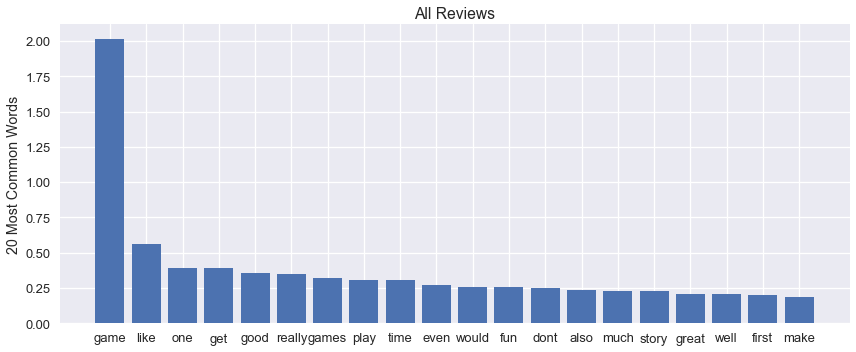

In [10]:
fig = plt.figure(figsize=(12, 5))
plt.bar(words, values_norm, figure=fig)
plt.ylabel('Average Occurances per Review')
plt.ylabel('20 Most Common Words')
plt.title('All Reviews')

plt.tight_layout()
plt.savefig('../visualizations/frequency-distribution-all.png')
plt.show()

In [11]:
reviews_pos = data[data['voted_up']]['review']
reviews_neg = data[~data['voted_up']]['review']

In [12]:
vocab_pos = []
for review in reviews_pos.tolist():
    vocab_pos += review.split()

vocab_neg = []
for review in reviews_neg.tolist():
    vocab_neg += review.split()

In [13]:
freqdist_pos = FreqDist(vocab_pos)
top_20_pos = freqdist_pos.most_common(20)

freqdist_neg = FreqDist(vocab_neg)
top_20_neg = freqdist_neg.most_common(20)

In [14]:
words_pos, values_pos = list(zip(*top_20_pos))
values_pos_norm = tuple(v/len(reviews_pos) for v in values_pos)

words_neg, values_neg = list(zip(*top_20_neg))
values_neg_norm = tuple(v/len(reviews_neg) for v in values_neg)

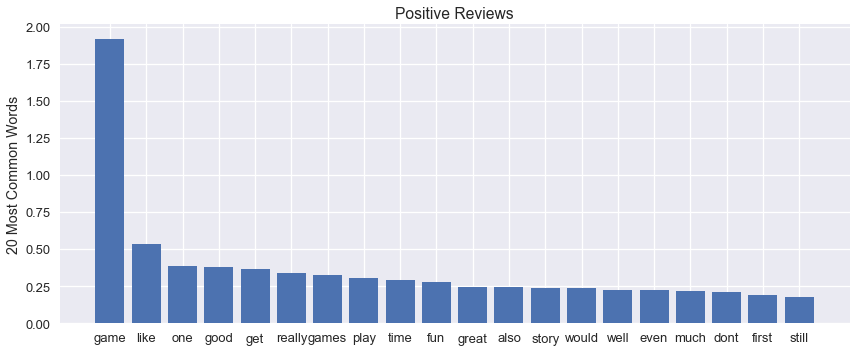

In [15]:
fig = plt.figure(figsize=(12, 5))
plt.bar(words_pos, values_pos_norm, figure=fig)
plt.ylabel('Average Occurances per Review')
plt.ylabel('20 Most Common Words')
plt.title('Positive Reviews')

plt.tight_layout()
plt.savefig('../visualizations/frequency-distribution-positive.png')
plt.show()

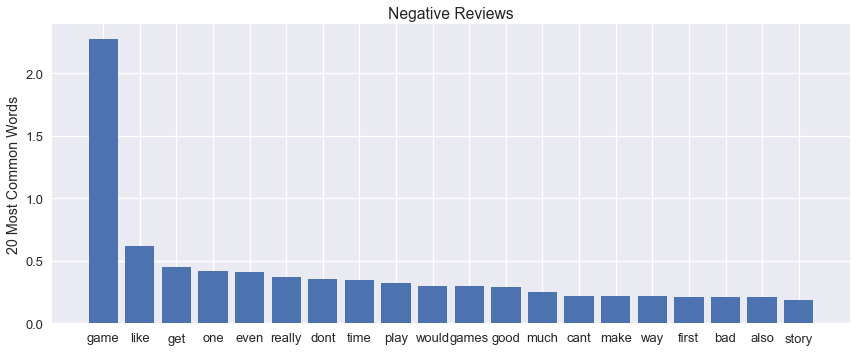

In [16]:
fig = plt.figure(figsize=(12, 5))
plt.bar(words_neg, values_neg_norm, figure=fig)
plt.ylabel('Average Occurances per Review')
plt.ylabel('20 Most Common Words')
plt.title('Negative Reviews')

plt.tight_layout()
plt.savefig('../visualizations/frequency-distribution-negative.png')
plt.show()

## Word Clouds

These results are more or less the same as the frequency distribution results. A lot more work needs to be done here.

In [17]:
from wordcloud import WordCloud

In [18]:
positive_dict = dict(zip(words_pos, values_pos))
negative_dict = dict(zip(words_neg, values_neg))

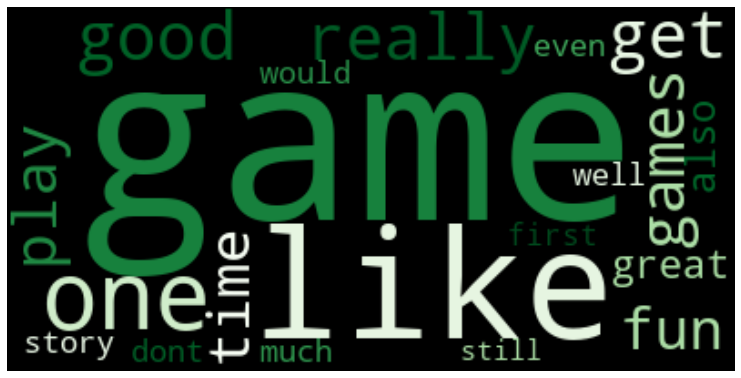

In [19]:
wordcloud = WordCloud(colormap='Greens').generate_from_frequencies(positive_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.savefig('../visualizations/wordcloud-positive.png')
plt.show()

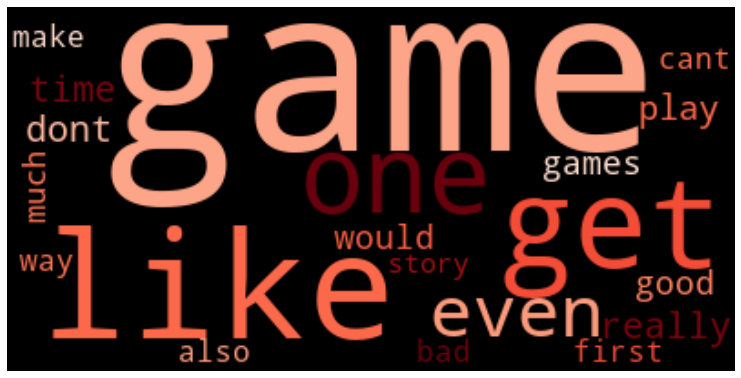

In [20]:
wordcloud = WordCloud(colormap='Reds').generate_from_frequencies(negative_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.savefig('../visualizations/wordcloud-negative.png')
plt.show()

Overall I am disappointed with this EDA. Most of these results are less than helpful, and work needs to be done in order to get real results. I ran out of time with this project, but I'd like to come back to this and get it working better.